In [1]:
path = "C:/Users/FEZA/My Drive/00. Drive PC/1.STIS/5. Semester 5/Information Retrieval [IR] P/berita"


Casefolding

In [2]:
def case_folding(text):
    text = text.lower()
    return text

Tokenisasi

In [3]:
import nltk
# nltk.download('punkt') # Download data yang diperlukan untuk tokenisasi
from nltk.tokenize import word_tokenize
def tokenisasi(text):
    tokens = word_tokenize(text)
    return tokens

Eliminasi Stopword

In [4]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('Indonesian'))

In [5]:
def eliminasi_stopword(token):
    return [kata for kata in token if kata not in stop_words]

Stemming 

In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming_sastrawi(tokens):
    # Membuat stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(token) for token in tokens]

In [7]:

import re
import os
inverted_index = {}
doc_dict = {}
i = 1
for filename in os.listdir(path):
    if (filename.endswith('.txt')):
        file_path = os.path.join(path, filename)
        # Ekstrak angka dari nama file menggunakan regular expressions
        match = re.search(r'\d+', filename)
        if match:
            doc_id = match.group() # Mengambil angka dari nama file sebagai dokumen ID
            with open (file_path, mode='r', encoding='utf-8') as file:
                text = file.read()
                hasil_case_folding = case_folding(text)
                token = tokenisasi(hasil_case_folding)
                token_bersih = eliminasi_stopword(token)
                stemm_token = stemming_sastrawi(token_bersih)
                stemm_token_final = [item for item in stemm_token if item != ''] # membersihkan term kosong pada hasil stemming sebelumnya
                # Menggabungkan hasil stemming menjadi sebuah teks/paragraf
                doc_dict[doc_id] = ' '.join(stemm_token_final)
                for term in set(stemm_token_final): # penggunaan set untuk mengantisipasi duplikasi term pada sebuah dokumen
                    if term in inverted_index:
                        inverted_index[term].append(doc_id)
                    else:
                        inverted_index[term] = [doc_id]

In [8]:
inverted_index

{'cek': ['1'],
 'siti': ['1'],
 'signifikan': ['1', '4'],
 'hijau': ['1'],
 'giat': ['1'],
 '24': ['1'],
 'tular': ['1'],
 'desember': ['1'],
 'dr': ['1', '5'],
 'wilayah': ['1', '5'],
 'p2pml': ['1'],
 'ppkm': ['1'],
 'terap': ['1'],
 'cegah': ['1'],
 'bijak': ['1'],
 'https': ['1', '2', '3', '4', '5'],
 'kab kota': ['1'],
 '2021': ['1'],
 'sehat': ['1'],
 'jakarta': ['1', '2', '3', '4', '5'],
 'sakit': ['1'],
 'bebas': ['1'],
 'picu': ['1'],
 'hitung': ['1'],
 'batas': ['1'],
 'masyarakat': ['1'],
 'langsung': ['1'],
 '-': ['1', '2', '3', '4', '5'],
 'kemenkes': ['1', '4'],
 'tarmizi': ['1'],
 'ri': ['1', '3', '4'],
 'direktur': ['1'],
 'health detik com berita-detikhealth d-5816690 wilayah-kamu-sudah-bebas-covid-19-cek-34-kabkota-zona-hijau-terbaru': ['1'],
 '2': ['1', '3'],
 'tahap': ['1'],
 'perintah': ['1'],
 'protokol': ['1'],
 'tingkat': ['1', '4'],
 'laku': ['1'],
 'rencana': ['1', '2'],
 'menteri': ['1'],
 'mobilitas': ['1'],
 'kaji': ['1'],
 'januari': ['1', '2'],
 'covid-19

In [9]:
doc_dict

{'1': 'wilayah bebas covid-19 cek 34 kab kota zona hijau baru jakarta - perintah rencana terap laku batas giat masyarakat ppkm level 3 hitung 24 desember 2021 2 januari 2021 menteri sehat ri bijak ppkm level 3 tahap kaji direktur cegah kendali sakit tular langsung p2pml kemenkes ri dr siti nadia tarmizi ppkm level 3 terap covid-19 signifikan picu tingkat mobilitas longgar protokol sehat https health detik com berita-detikhealth d-5816690 wilayah-kamu-sudah-bebas-covid-19-cek-34-kabkota-zona-hijau-terbaru',
 '2': 'vaksin covid-19 rutin gantung jelas jakarta - beri booster dosis tiga vaksin covid-19 indonesia rencana januari 2022 lantas ada vaksinasi covid-19 vaksinasi influenza ketua satgas covid-19 ikat dokter indonesia idi prof zubairi djoerban pasti kait turut vaksin covid-19 booster vaksinasi covid-19 https health detik com berita-detikhealth d-5816582 vaksin-covid-19-bakal-rutin-setiap-tahun-tergantung-ini-penjelasannya',
 '3': 'ri suntik booster 2022 ampuh lawan varian delta cs ja

Vocabulary List dari Inverted Index

In [10]:
vocab = list(inverted_index.keys())
print(f'Vocabulary List: {vocab}')

Vocabulary List: ['cek', 'siti', 'signifikan', 'hijau', 'giat', '24', 'tular', 'desember', 'dr', 'wilayah', 'p2pml', 'ppkm', 'terap', 'cegah', 'bijak', 'https', 'kab kota', '2021', 'sehat', 'jakarta', 'sakit', 'bebas', 'picu', 'hitung', 'batas', 'masyarakat', 'langsung', '-', 'kemenkes', 'tarmizi', 'ri', 'direktur', 'health detik com berita-detikhealth d-5816690 wilayah-kamu-sudah-bebas-covid-19-cek-34-kabkota-zona-hijau-terbaru', '2', 'tahap', 'perintah', 'protokol', 'tingkat', 'laku', 'rencana', 'menteri', 'mobilitas', 'kaji', 'januari', 'covid-19', 'nadia', 'longgar', 'level', 'zona', '34', 'kendali', 'baru', '3', 'gantung', 'vaksin', 'ada', 'djoerban', 'influenza', 'turut', 'vaksinasi', 'booster', 'kait', 'idi', 'satgas', 'lantas', 'pasti', 'rutin', 'beri', 'prof', 'tiga', 'zubairi', 'jelas', '2022', 'health detik com berita-detikhealth d-5816582 vaksin-covid-19-bakal-rutin-setiap-tahun-tergantung-ini-penjelasannya', 'ketua', 'dosis', 'indonesia', 'dokter', 'ikat', 'strain', 'pfize

Top 3 Document Retrieval

In [11]:
query = 'vaksin corona jakarta'

Membuat term frequency

In [12]:
def termFrequency(vocab, query): # term frequency berdasarkan query
    tf_query = {}
    for word in vocab:
        tf_query[word] = query.count(word)
    return tf_query

tf_query = termFrequency(vocab, query)
tf_query

{'cek': 0,
 'siti': 0,
 'signifikan': 0,
 'hijau': 0,
 'giat': 0,
 '24': 0,
 'tular': 0,
 'desember': 0,
 'dr': 0,
 'wilayah': 0,
 'p2pml': 0,
 'ppkm': 0,
 'terap': 0,
 'cegah': 0,
 'bijak': 0,
 'https': 0,
 'kab kota': 0,
 '2021': 0,
 'sehat': 0,
 'jakarta': 1,
 'sakit': 0,
 'bebas': 0,
 'picu': 0,
 'hitung': 0,
 'batas': 0,
 'masyarakat': 0,
 'langsung': 0,
 '-': 0,
 'kemenkes': 0,
 'tarmizi': 0,
 'ri': 0,
 'direktur': 0,
 'health detik com berita-detikhealth d-5816690 wilayah-kamu-sudah-bebas-covid-19-cek-34-kabkota-zona-hijau-terbaru': 0,
 '2': 0,
 'tahap': 0,
 'perintah': 0,
 'protokol': 0,
 'tingkat': 0,
 'laku': 0,
 'rencana': 0,
 'menteri': 0,
 'mobilitas': 0,
 'kaji': 0,
 'januari': 0,
 'covid-19': 0,
 'nadia': 0,
 'longgar': 0,
 'level': 0,
 'zona': 0,
 '34': 0,
 'kendali': 0,
 'baru': 0,
 '3': 0,
 'gantung': 0,
 'vaksin': 1,
 'ada': 0,
 'djoerban': 0,
 'influenza': 0,
 'turut': 0,
 'vaksinasi': 0,
 'booster': 0,
 'kait': 0,
 'idi': 0,
 'satgas': 0,
 'lantas': 0,
 'pasti': 0,

Membuat Word Document Frequency

In [13]:
def wordDocFre(vocab, doc_dict):
    df = {}
    for word in vocab:
        frq = 0
        for doc in doc_dict.values():
            if word in tokenisasi(doc):
                frq = frq + 1
        df[word] = frq
    return df

Membuat IDF

In [14]:
import numpy as np
def inverseDocFre(vocab, doc_fre, length): # fungsi untuk menghasilkan idf
    idf = {}
    for word in vocab:
        idf[word] = 1 + np.log((length + 1) / (doc_fre[word]+1))
    return idf

In [15]:
def termFrequencyInDoc(vocab, doc_dict):
    tf_docs = {}
    for doc_id in doc_dict.keys():
        tf_docs[doc_id] = {}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_docs[doc_id][word] = doc.count(word)
    return tf_docs

TF-IDF

In [16]:
def tfidf(vocab, tf, idf_scr, doc_dict):
    tf_idf_scr = {}
    for doc_id in doc_dict.keys():
        tf_idf_scr[doc_id] = {}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_idf_scr[doc_id][word] = tf[doc_id][word] * idf_scr[word]
    return tf_idf_scr

Matriks Term Document (TD)

In [17]:
tf_idf = tfidf(vocab, termFrequencyInDoc(vocab, doc_dict), inverseDocFre(vocab, wordDocFre(vocab, doc_dict), len(doc_dict)), doc_dict)
# Term - Document Matrix
TD = np.zeros((len(vocab), len(doc_dict)))
for word in vocab:
    for doc_id,doc in tf_idf.items():
        ind1 = vocab.index(word)
        ind2 = list(tf_idf.keys()).index(doc_id)
        TD[ind1][ind2] = tf_idf[doc_id][word]
print(TD)

[[ 4.19722458  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 1.69314718  0.          0.          1.69314718  0.        ]
 [ 4.19722458  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 1.69314718  0.          0.          0.          1.69314718]
 [ 3.38629436  0.          0.          0.          1.69314718]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 6.29583687  0.          0.          0.          0.        ]
 [ 4.19722458  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 2.09861229  0.          0.          0.          0.        ]
 [ 1.          1.          1.          1.          1.  

In [18]:
idf = inverseDocFre(vocab, wordDocFre(vocab, doc_dict),len(doc_dict))

Membuat Term - Query Matrix (TQ)

In [19]:
# Term - Query Matrix
TQ = np.zeros((len(vocab), 1)) # hanya 1 query
for word in vocab:
    ind1 = vocab.index(word)
    TQ[ind1][0] = tf_query[word]*idf[word]
print(TQ)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.69314718]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

Cosine Similarity

In [20]:
import math
def cosine_sim(vec1, vec2):
    vec1 = list(vec1)
    vec2 = list(vec2)
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))

    mag_1 = np.squeeze(mag_1)
    mag_2 = np.squeeze(mag_2)
    return dot_prod / (mag_1 * mag_2)

Exact Top K Document

In [21]:
from collections import OrderedDict
def topk(doc_dict, TD, q, k):
    relevance_scores = {}
    i = 0
    for doc_id in doc_dict.keys():
        relevance_scores[doc_id] = cosine_sim(q, TD[:, i])
        i = i + 1
        
    sorted_value = OrderedDict(sorted(relevance_scores.items(), key=lambda x: x[1], reverse = True))
    top_k = {j: sorted_value[j] for j in list(sorted_value)[:k]}
    # penghitungan time complexity (disusun oleh banyak dokumen + proses pengurutan + seleksi top k)
    time_complexity_k = len(doc_dict) + (len(doc_dict) * (len(doc_dict).bit_length() - 1)) + k
    return top_k, time_complexity_k

In [22]:
def retriev(vocab, query, doc_dict, k):
    tf_query = termFrequency(vocab, query)
    idf = inverseDocFre(vocab, wordDocFre(vocab, doc_dict), len(doc_dict))
   

    TQ = np.zeros((len(vocab), 1))

    for word in vocab: # iterasi untuk pemobobotan tf-idf term-query matriks
        ind1 = vocab.index(word) # memberikan index pada tiap kata pada vocab
        TQ[ind1][0] = tf_query[word]*idf[word]

    # implementasi fungsi pembobotan tf-idf antara tiap term dalam vocab dan tiap dokumen di dalam corpus untuk digunakan dalam konstruksi term-document matriks
    tf_idf = tfidf(vocab, termFrequencyInDoc(vocab, doc_dict), idf, doc_dict)

    # inisialisasi term-query matriks dengan matriks 0 dengan banyak baris sebanyak len(vocab) dan banyak kolom sebanyak len(doc_dict)
    TD = np.zeros((len(vocab), len(doc_dict)))
    for word in vocab: # iterasi untuk konstruksi term-document matriks
        for doc_id, doc in tf_idf.items():
            ind1 = vocab.index(word)
            ind2 = list(tf_idf.keys()).index(doc_id)
            TD[ind1][ind2] = tf_idf[doc_id][word]

    # implementasi fungsi pemilihan top k dokumen beserta penghitungan time complexitinya
    top_k_results, complexity_k = topk(doc_dict, TD, TQ, k)

    # penghitungan time complexity (disusun oleh penghitungan tf_query + pembuatan TQ + penghitungan tf-idf + pembuatan TD + penghitungan top k)
    time_complexity_main = len(vocab) + len(vocab) + (len(vocab) * len(doc_dict)) + (len(vocab) * len(doc_dict)) + len(doc_dict) + complexity_k
    
    return top_k_results, TQ, TD, time_complexity_main

Relevance Feedback

[[ 4.19722458  2.09861229  1.69314718  4.19722458  2.09861229  2.09861229
   2.09861229  2.09861229  1.69314718  3.38629436  2.09861229  6.29583687
   4.19722458  2.09861229  2.09861229  1.          2.79175947  3.38629436
   4.19722458  1.          2.09861229  4.19722458  2.09861229  2.09861229
   2.09861229  2.09861229  2.09861229 16.          1.69314718  2.09861229
   8.43279065  2.09861229  2.79175947 11.85203026  2.09861229  2.09861229
   2.09861229  1.69314718  2.09861229  1.69314718  2.09861229  2.09861229
   2.09861229  1.69314718  3.          2.09861229  2.09861229  6.29583687
   4.19722458  4.19722458  2.09861229  2.81093022 10.49306144  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.09861229  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         10.15888308
   0

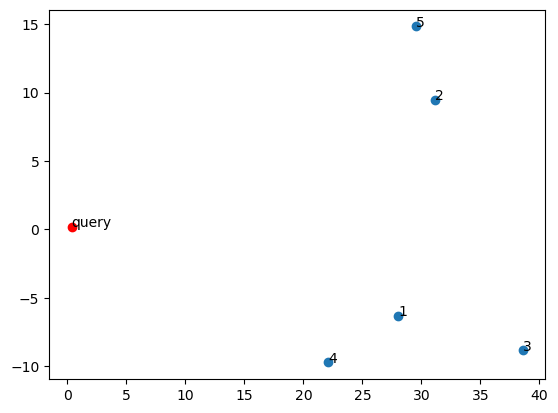

In [23]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
DT = TD.transpose()
print(DT)
model = TruncatedSVD(n_components=2, random_state=7).fit(DT)
DT_reduced = model.transform(DT)
QT_reduced = model.transform(TQ.transpose())
print(QT_reduced)
print(DT_reduced)
plt.scatter(DT_reduced[:, 0], DT_reduced[:, 1])
plt.scatter(QT_reduced[:, 0], QT_reduced[:, 1], color=["red"])
labels=list(doc_dict.keys())

for i, txt in enumerate(labels):
    plt.annotate(txt, (DT_reduced[i, 0], DT_reduced[i, 1]))
plt.annotate("query", (QT_reduced[0, 0], QT_reduced[0, 1]))
plt.show()


Hasil Top 5 Pertama Sebelum Relevance Feedback

In [24]:
top_5 = topk(doc_dict, TD, TQ[:, 0], 5)
print(top_5)

({'2': 0.22852766914987063, '3': 0.16614749506418533, '5': 0.07374686362135464, '4': 0.05172409196454835, '1': 0.011143630661714601}, 20)


In [65]:
k = 5
top_5_result, TQ, TD, time = retriev(vocab, query, doc_dict, k)

print(f'\nHasil perankingan top {k} dokumen:')

i = 1
for no_doc, cosine_similarity in top_5_result.items():
    print(f'{i}. Dokumen {no_doc} dengan nilai cosine similarity = {cosine_similarity}')
    i += 1


Hasil perankingan top 5 dokumen:
1. Dokumen 2 dengan nilai cosine similarity = [0.22852767]
2. Dokumen 3 dengan nilai cosine similarity = [0.1661475]
3. Dokumen 5 dengan nilai cosine similarity = [0.07374686]
4. Dokumen 4 dengan nilai cosine similarity = [0.05172409]
5. Dokumen 1 dengan nilai cosine similarity = [0.01114363]


In [46]:
rel_judgement = {
'1': 0,
'2': 1,
'3': 1,
'4': 0,
'5': 0,
}

rel_docs = [] 
nrel_docs = [] # inisilisasi list kosong untuk menyimpan dokumen yang relevan
for doc_id, rel in rel_judgement.items():
    if rel==1:
        rel_docs.append(doc_id)
    else:
        nrel_docs.append(doc_id)

In [47]:
rel_vecs = []
doc_ids = list(doc_dict.keys())
for doc in rel_docs:
    rel_vecs.append(DT[doc_ids.index(doc),:])
    
nrel_vecs = []
for doc in nrel_docs:
    nrel_vecs.append(DT[doc_ids.index(doc),:])


In [48]:
query_vecs = TQ.transpose()
alpha = 1
beta = 0.75
gamma = 0.15
# Update query vectors with Rocchio algorithm
query_vecs = alpha * query_vecs + beta * np.mean(rel_vecs, axis=0) - gamma * np.mean(nrel_vecs, axis=0)
query_vecs[query_vecs<0] = 0 #negative value => 0

In [67]:
top_5 = topk(doc_dict, TD, query_vecs[0, :].transpose(), 5)

print("Hasil perankingan top 5 dokumen setelah relevance feedback:")
for doc_id, cosine_similarity in top_5[0].items():
    print(f"Dokumen {doc_id} dengan nilai cosine similarity = [{cosine_similarity}]")

Hasil perankingan top 5 dokumen setelah relevance feedback:
Dokumen 3 dengan nilai cosine similarity = [0.9349650161069505]
Dokumen 2 dengan nilai cosine similarity = [0.9218725561589912]
Dokumen 5 dengan nilai cosine similarity = [0.6765286666556104]
Dokumen 1 dengan nilai cosine similarity = [0.6362395890121536]
Dokumen 4 dengan nilai cosine similarity = [0.5765607944527157]


Dapat dilihat bahwa terdapat perbedaan top_k document setelah dilakukan relevance feedback. Hal ini menandakan algoritma Rocchio berhasil diterapkan

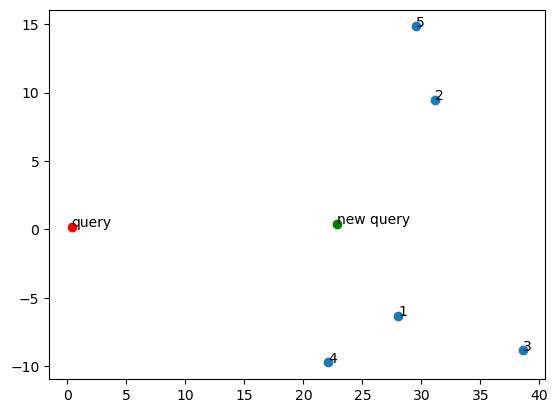

In [66]:
QT1_reduced = model.transform(query_vecs)
plt.scatter(DT_reduced[:, 0], DT_reduced[:, 1])
plt.scatter(QT_reduced[:, 0], QT_reduced[:, 1], color=["red"])
plt.scatter(QT1_reduced[:, 0], QT1_reduced[:, 1], color=["green"])
doc_ids=list(doc_dict.keys())
for i, txt in enumerate(doc_ids):
    plt.annotate(txt, (DT_reduced[i, 0], DT_reduced[i, 1]))
plt.annotate("query", (QT_reduced[0, 0], QT_reduced[0, 1]))
plt.annotate("new query", (QT1_reduced[:, 0], QT1_reduced[:, 1]))
plt.show()


## Query Expansion dengan Thesaurus

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FEZA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\FEZA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from itertools import chain
from nltk.corpus import wordnet
query = "information system"
expand_list = []
for term in query.split(" "):
    synonyms = wordnet.synsets(term)
    lemmas = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
    print(lemmas)
    expand_list = expand_list + list(lemmas)
    
print(expand_list)
query_expand = query + " " + (" ".join(expand_list)).replace("_", " ")
print(query_expand)

{'entropy', 'info', 'information', 'data', 'selective_information'}
{'system_of_rules', 'system', 'organisation', 'arrangement', 'organization', 'scheme'}
['entropy', 'info', 'information', 'data', 'selective_information', 'system_of_rules', 'system', 'organisation', 'arrangement', 'organization', 'scheme']
information system entropy info information data selective information system of rules system organisation arrangement organization scheme
